In [ ]:
#Needed packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv("teen_phone_addiction_dataset.csv")

display(df.head())

Saving teen_phone_addiction_dataset.csv to teen_phone_addiction_dataset.csv


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [ ]:
columns_to_drop = [
    'ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
    'Academic_Performance', 'Anxiety_Level', 'Depression_Level',
    'Self_Esteem', 'Social_Interactions', 'Exercise_Hours',
    'Family_Communication', 'Addiction_Level'
]

df_usage = df.drop(columns=columns_to_drop)

if 'Phone_Usage_Purpose' in df_usage.columns:
    df_usage = pd.get_dummies(df_usage, columns=['Phone_Usage_Purpose'], drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_usage)


In [ ]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

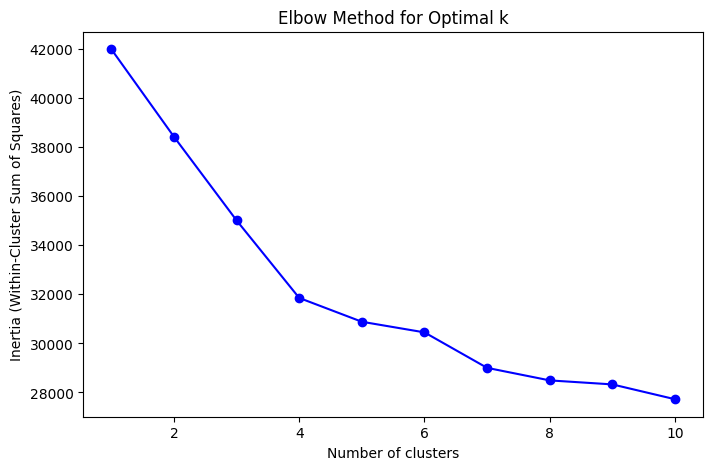

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#Labels
df['Cluster'] = clusters


In [ ]:
usage_features = df_usage.columns.tolist()

#Summaries
cluster_summary = df_usage.groupby(df['Cluster'])[usage_features].mean()
print("Cluster Summary (mean values of features):")
print(cluster_summary)

Cluster Summary (mean values of features):
         Daily_Usage_Hours  Sleep_Hours  Parental_Control  \
Cluster                                                     
0                 5.090244     6.371777          0.479094   
1                 4.867304     6.473391          0.507826   
2                 4.935050     6.598505          0.518272   
3                 5.100560     6.499119          0.514812   

         Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used_Daily  \
Cluster                                                                  
0                      1.019164             83.179443        12.982578   
1                      0.982957             84.314783        12.426087   
2                      1.042525             81.890365        12.933555   
3                      0.994716             83.070456        12.365893   

         Time_on_Social_Media  Time_on_Gaming  Time_on_Education  \
Cluster                                                            
0        

In [ ]:
comparison_features = [
    'Academic_Performance', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem'
]

cluster_comparison = df.groupby('Cluster')[comparison_features].mean()
print("Cluster Comparison vs Outcomes:")
print(cluster_comparison)

Cluster Comparison vs Outcomes:
         Academic_Performance  Anxiety_Level  Depression_Level  Self_Esteem
Cluster                                                                    
0                   75.580139       5.398955          5.343206     5.513937
1                   74.721739       5.572174          5.526957     5.377391
2                   75.227575       5.838870          5.495017     5.564784
3                   74.625300       5.566053          5.466773     5.630104


/tmp/ipython-input-606210620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')


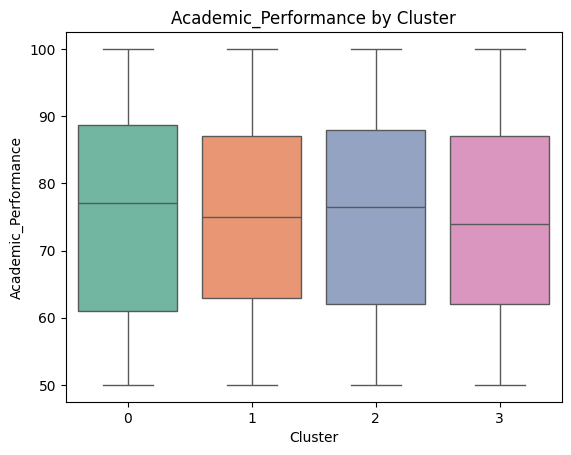

/tmp/ipython-input-606210620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')


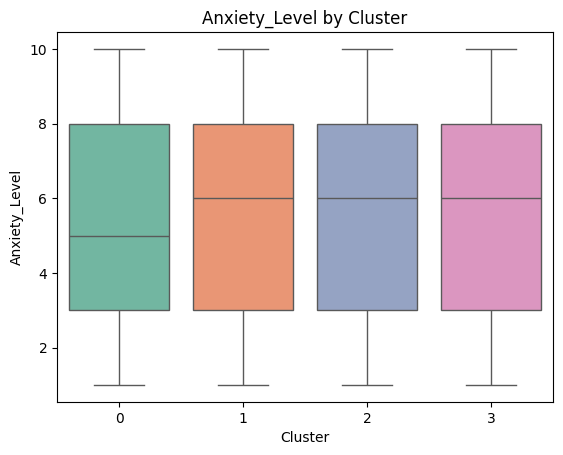

/tmp/ipython-input-606210620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')


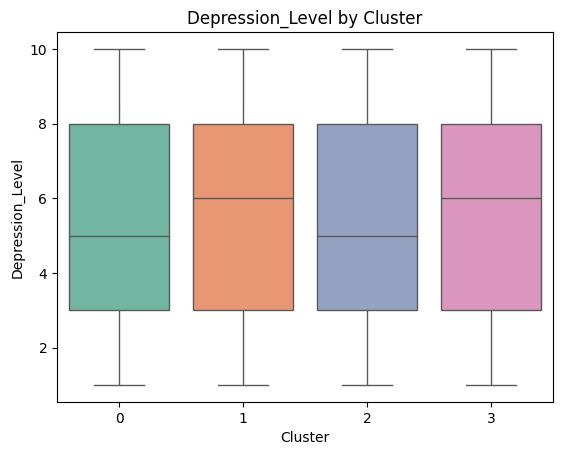

/tmp/ipython-input-606210620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')


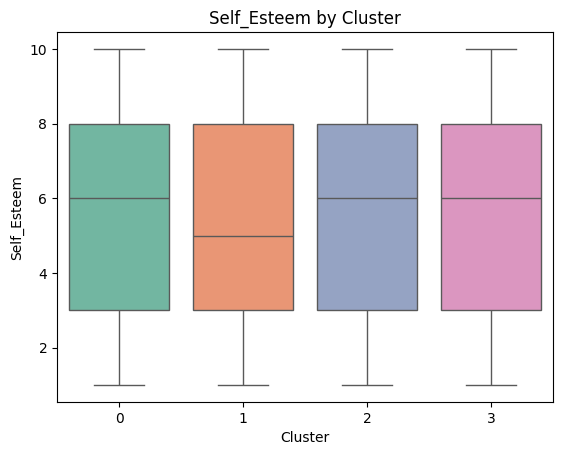

In [ ]:
for feature in comparison_features:
    sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Cluster')
    plt.show()

In [ ]:
print(cluster_summary)

         Daily_Usage_Hours  Sleep_Hours  Parental_Control  \
Cluster                                                     
0                 5.090244     6.371777          0.479094   
1                 4.867304     6.473391          0.507826   
2                 4.935050     6.598505          0.518272   
3                 5.100560     6.499119          0.514812   

         Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used_Daily  \
Cluster                                                                  
0                      1.019164             83.179443        12.982578   
1                      0.982957             84.314783        12.426087   
2                      1.042525             81.890365        12.933555   
3                      0.994716             83.070456        12.365893   

         Time_on_Social_Media  Time_on_Gaming  Time_on_Education  \
Cluster                                                            
0                    2.417247        1.556272       

In [ ]:
outcomes = ['Academic_Performance', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem']
cluster_outcomes = df.groupby('Cluster')[outcomes].mean()
print(cluster_outcomes)

         Academic_Performance  Anxiety_Level  Depression_Level  Self_Esteem
Cluster                                                                    
0                   75.580139       5.398955          5.343206     5.513937
1                   74.721739       5.572174          5.526957     5.377391
2                   75.227575       5.838870          5.495017     5.564784
3                   74.625300       5.566053          5.466773     5.630104
